In [11]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.cbook.deprecation import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

In [12]:
data = pd.read_csv('./Shakespeare_data.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111389 non-null object
Player-Line         111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [14]:
data['Player'].replace(np.nan, 'Other',inplace = True)
data.head(5)

Dataline      Play  PlayerLinenumber ActSceneLine         Player  \
0         1  Henry IV               NaN          NaN          Other   
1         2  Henry IV               NaN          NaN          Other   
2         3  Henry IV               NaN          NaN          Other   
3         4  Henry IV               1.0        1.1.1  KING HENRY IV   
4         5  Henry IV               1.0        1.1.2  KING HENRY IV   

                                         Player-Line  
0                                              ACT I  
1                       SCENE I. London. The palace.  
2  Enter KING HENRY, LORD JOHN OF LANCASTER, the ...  
3             So shaken as we are, so wan with care,  
4         Find we a time for frighted peace to pant,

In [15]:
print("Number of plays are: " + str(data['Play'].nunique()))

Number of plays are: 36


In [16]:
pd.DataFrame(data['Play'].unique().tolist(), columns=['Play Name'])

Play Name
0                   Henry IV
1            Henry VI Part 1
2            Henry VI Part 2
3            Henry VI Part 3
4   Alls well that ends well
5             As you like it
6       Antony and Cleopatra
7         A Comedy of Errors
8                 Coriolanus
9                  Cymbeline
10                    Hamlet
11                   Henry V
12                Henry VIII
13                 King John
14             Julius Caesar
15                 King Lear
16        Loves Labours Lost
17                   macbeth
18       Measure for measure
19        Merchant of Venice
20    Merry Wives of Windsor
21  A Midsummer nights dream
22    Much Ado about nothing
23                   Othello
24                  Pericles
25                Richard II
26               Richard III
27          Romeo and Juliet
28       Taming of the Shrew
29               The Tempest
30           Timon of Athens
31          Titus Andronicus
32      Troilus and Cressida
33             Twelfth Night
34   Two Gentlemen of Verona
35            A Winters Tale

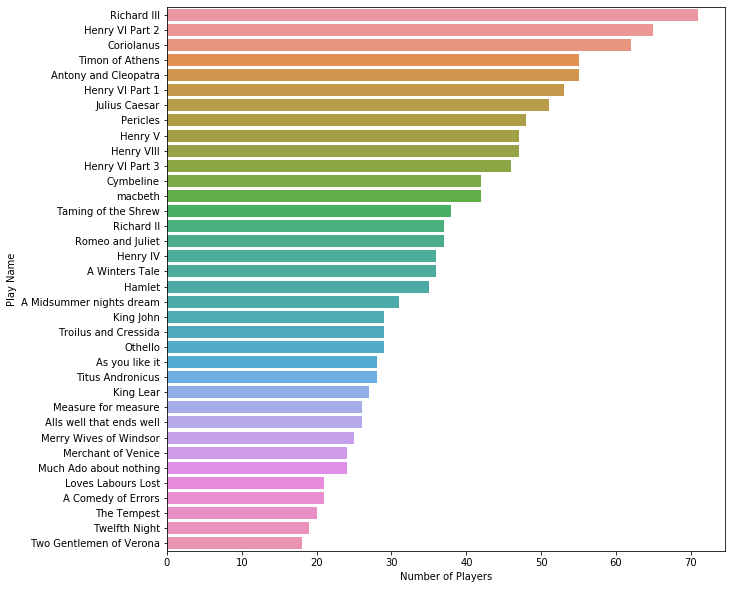

In [17]:
numberPlayers = data.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
numberPlayers['Play'] = numberPlayers.index.tolist()
numberPlayers.columns = ['Num Players','Play']
numberPlayers.index= np.arange(0,len(numberPlayers))
numberPlayers

plt.figure(figsize=(10,10))
ax = sns.barplot(x='Num Players',y='Play',data=numberPlayers)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()

In [20]:
play_data = data.groupby('Play').count().sort_values(by='Player-Line',ascending=False)['Player-Line']
play_data = play_data.to_frame()
play_data['Play'] = play_data.index.tolist()
play_data.index = np.arange(0,len(play_data)) #changing the index from plays to numbers
play_data.columns =['Lines','Play']

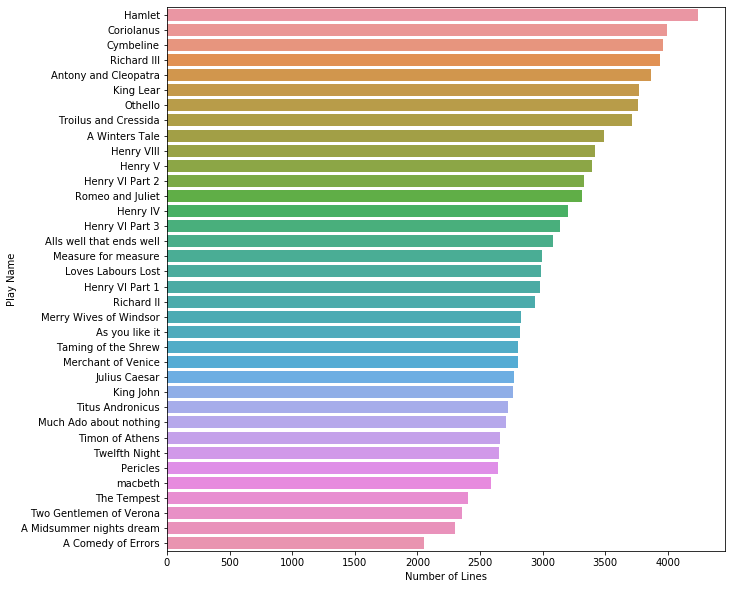

In [21]:
plt.figure(figsize=(10,10))
ax= sns.barplot(x='Lines',y='Play',data=play_data, order = play_data['Play'])
ax.set(xlabel='Number of Lines', ylabel='Play Name')
plt.show()


In [22]:
lines_per_player= data.groupby(['Play','Player']).count()['Player-Line']
lines_per_player= lines_per_player.to_frame()

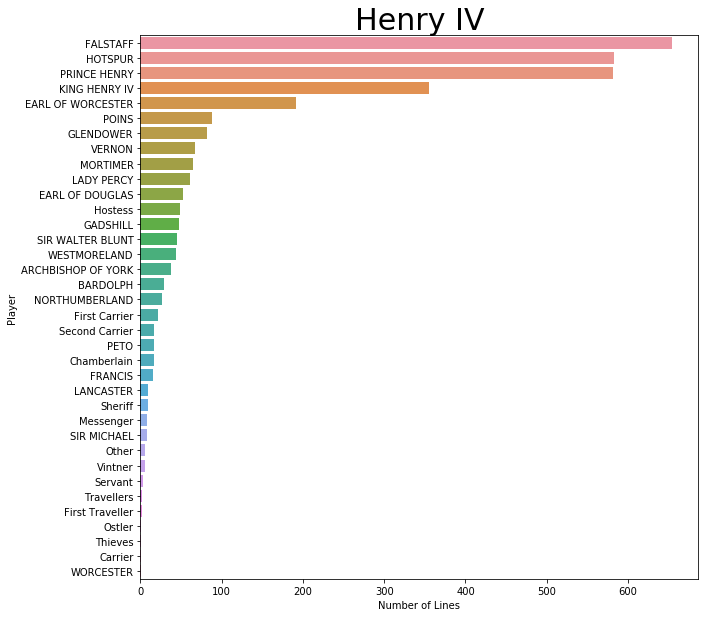

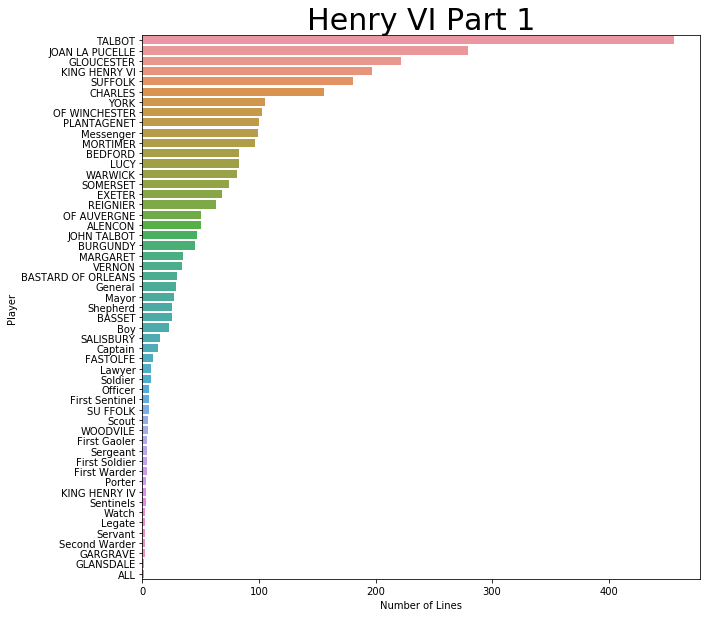

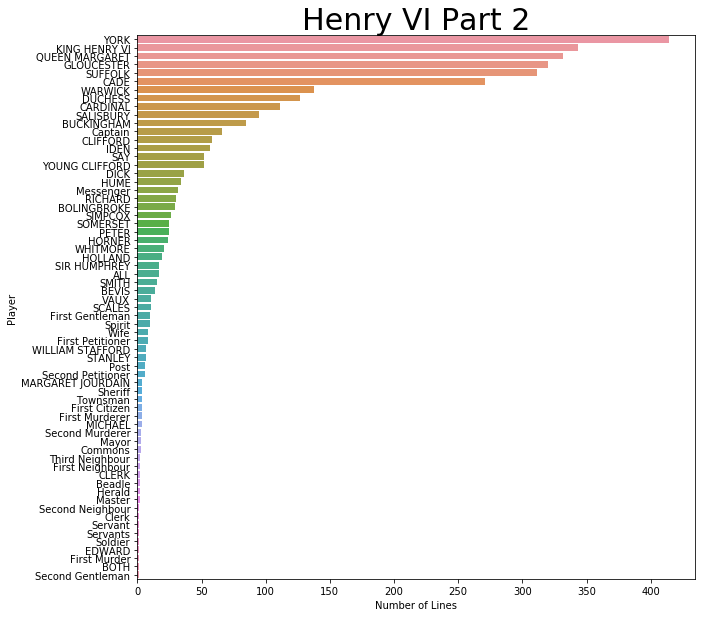

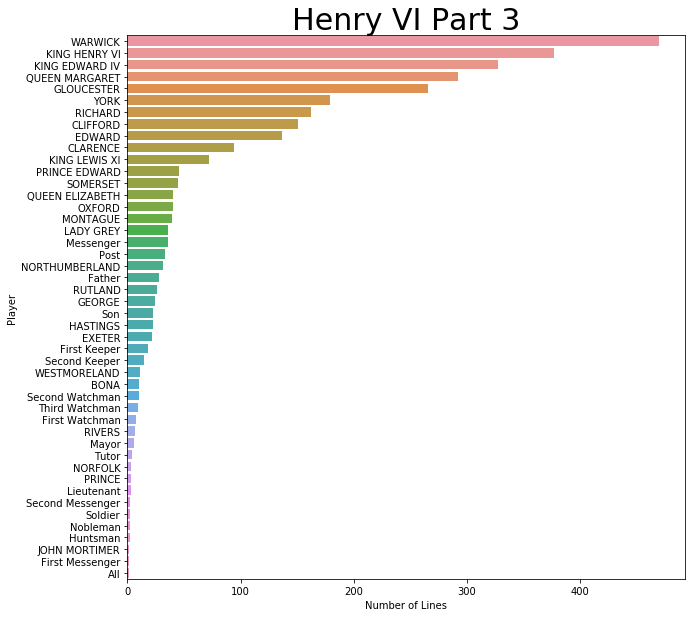

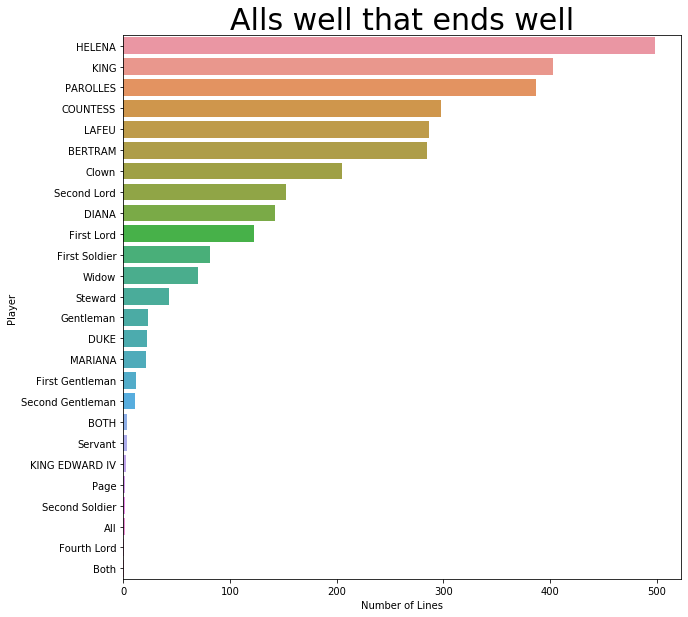

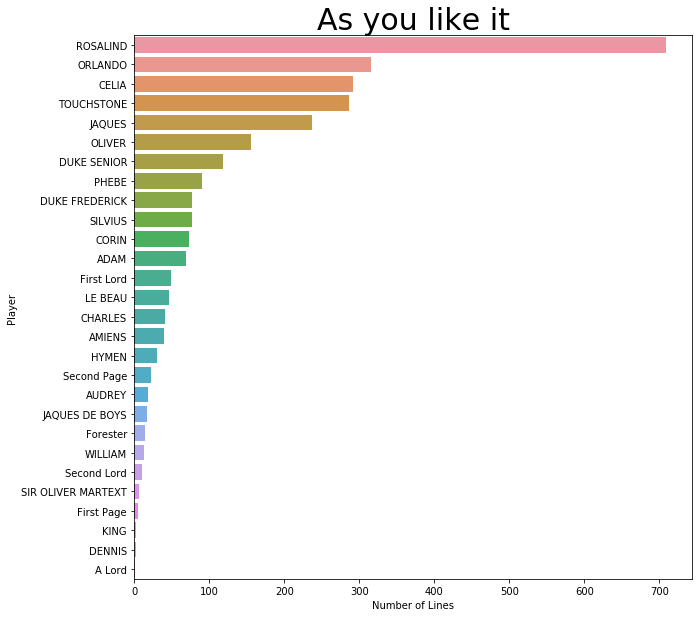

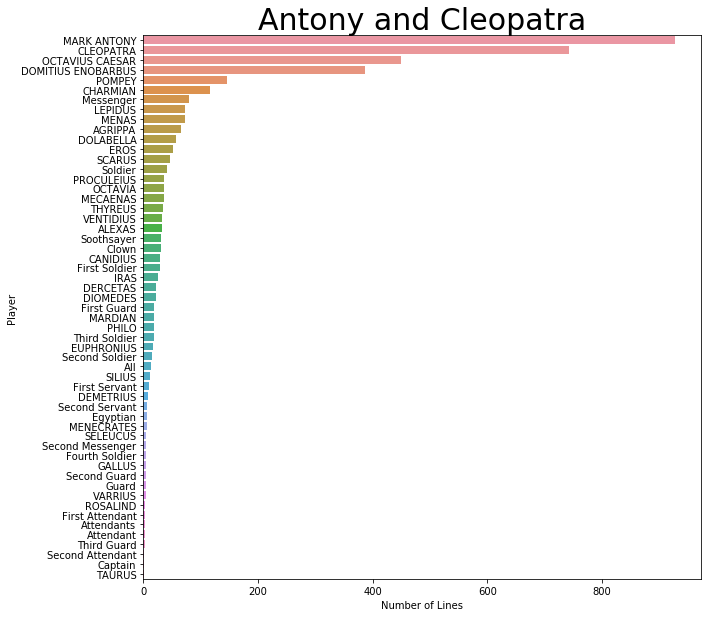

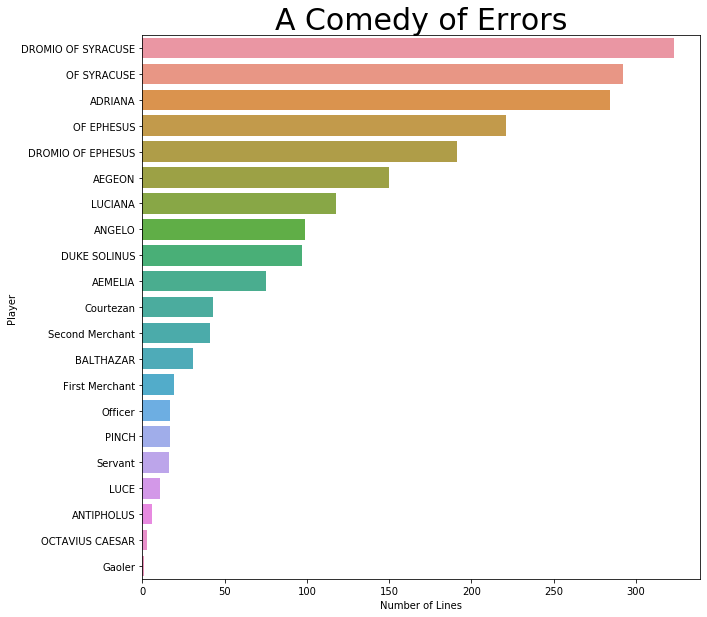

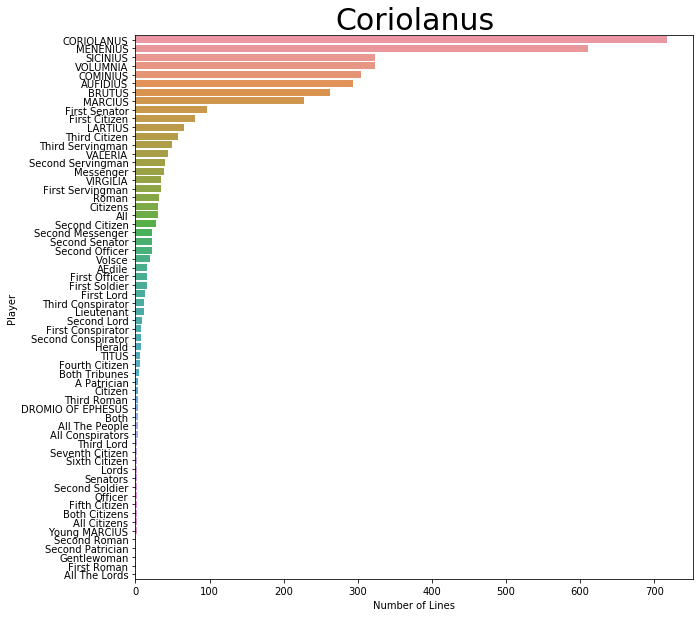

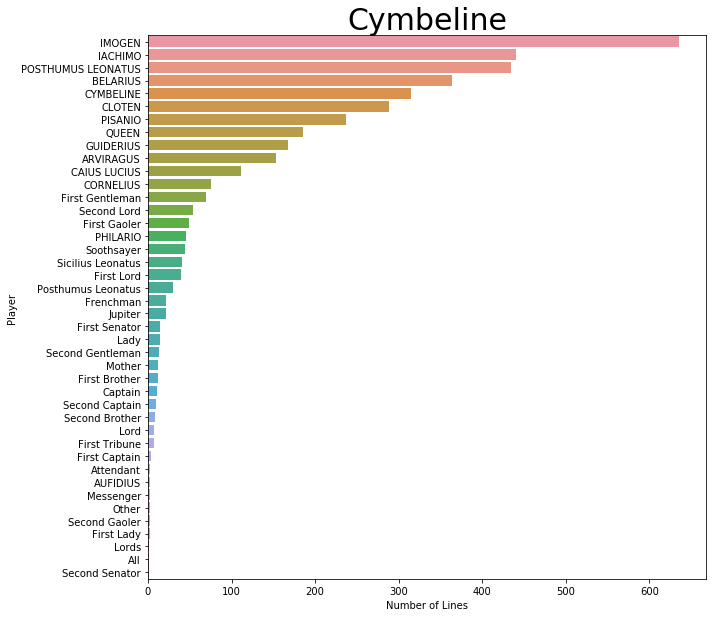

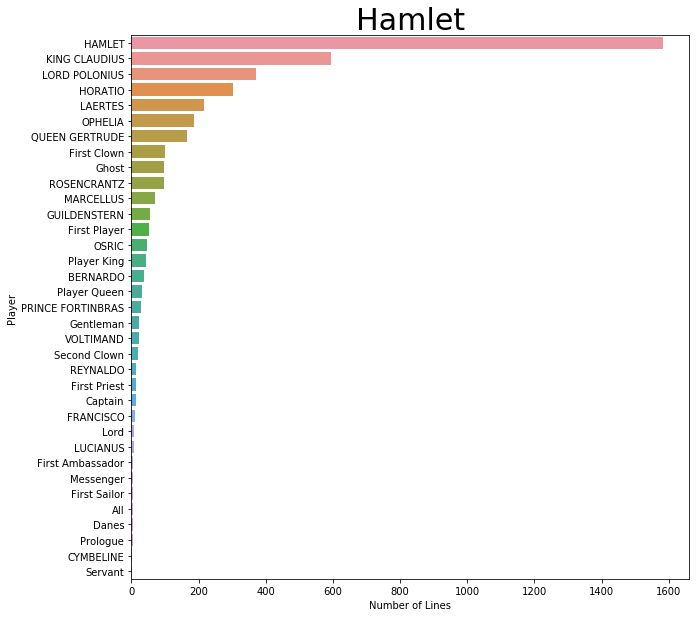

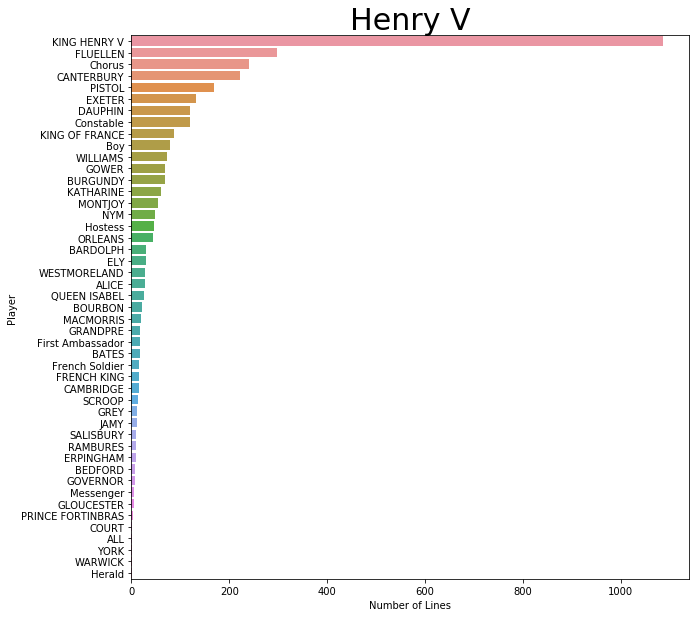

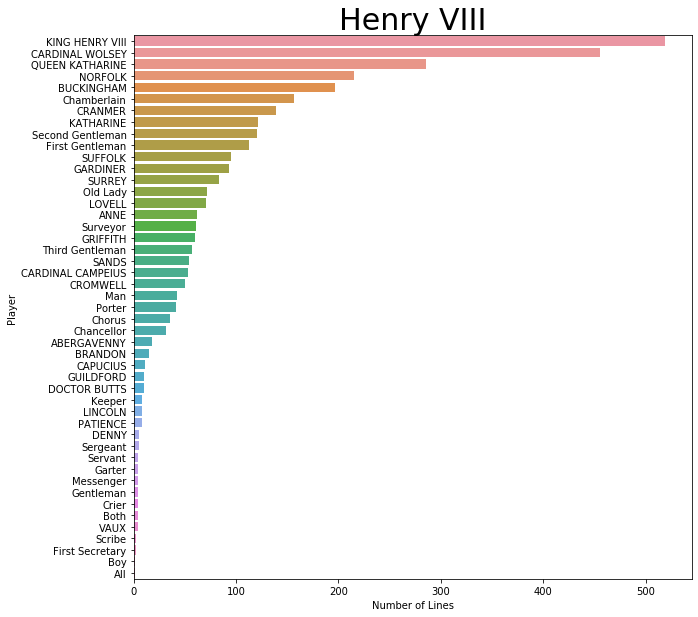

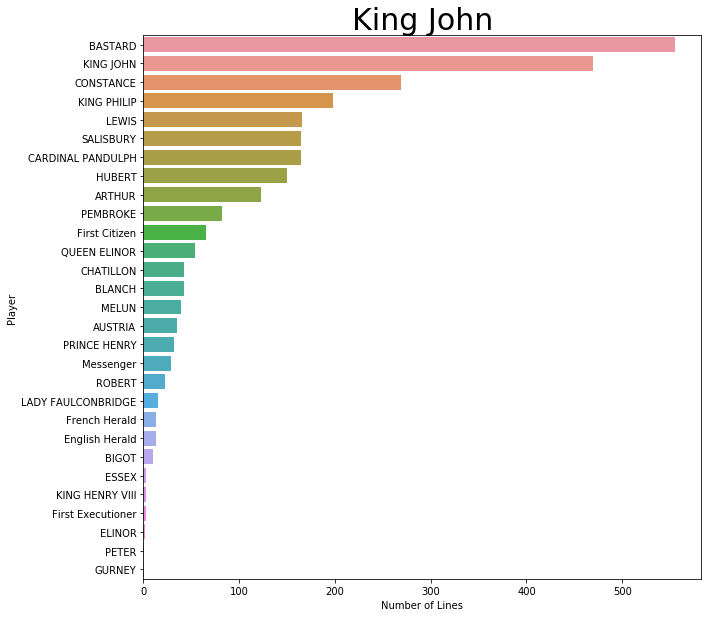

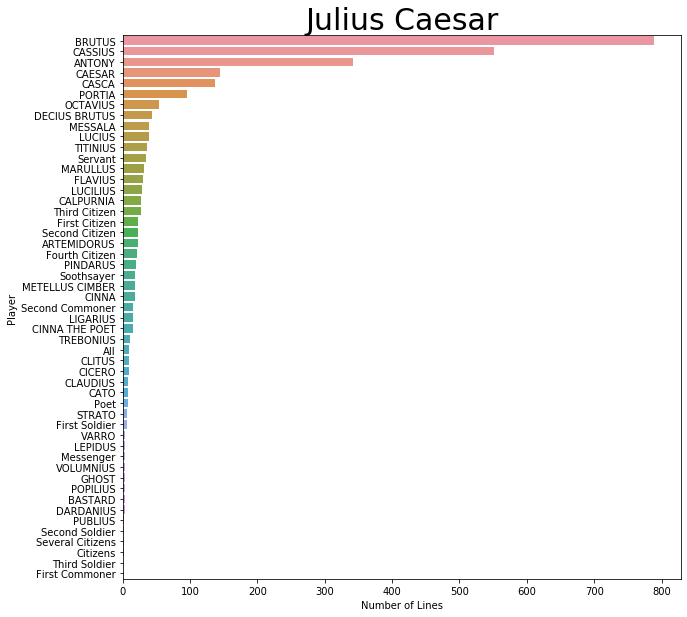

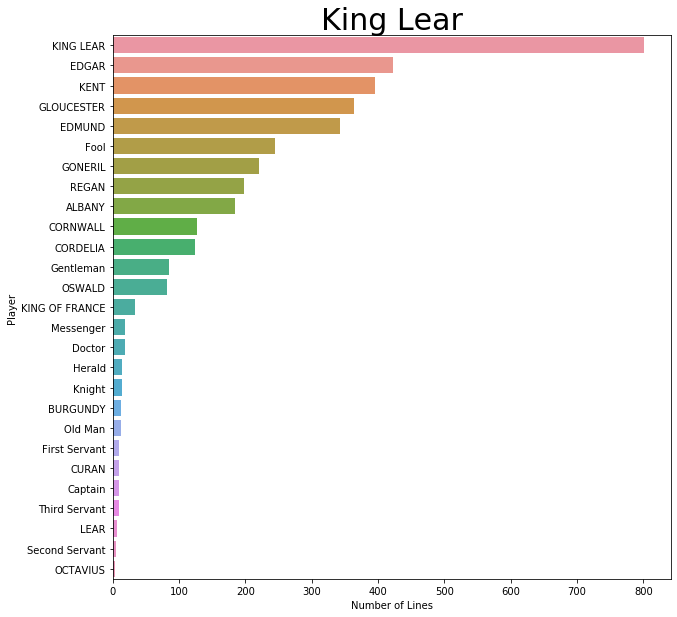

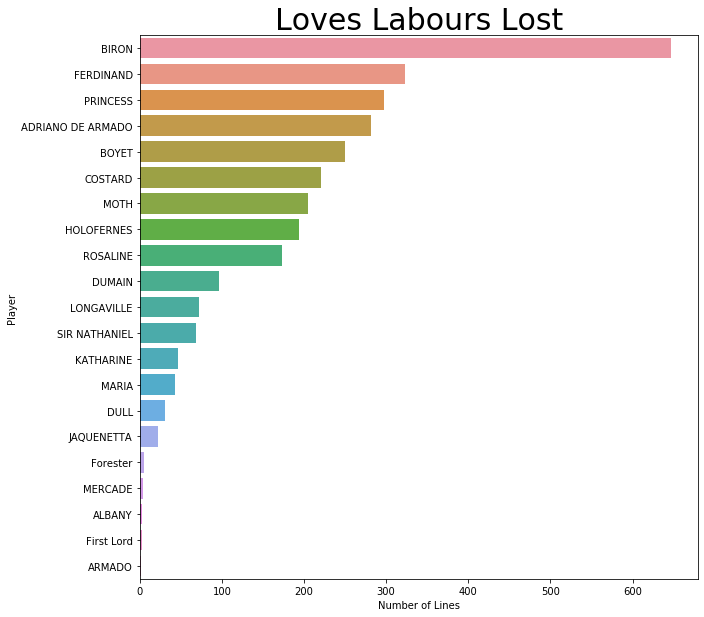

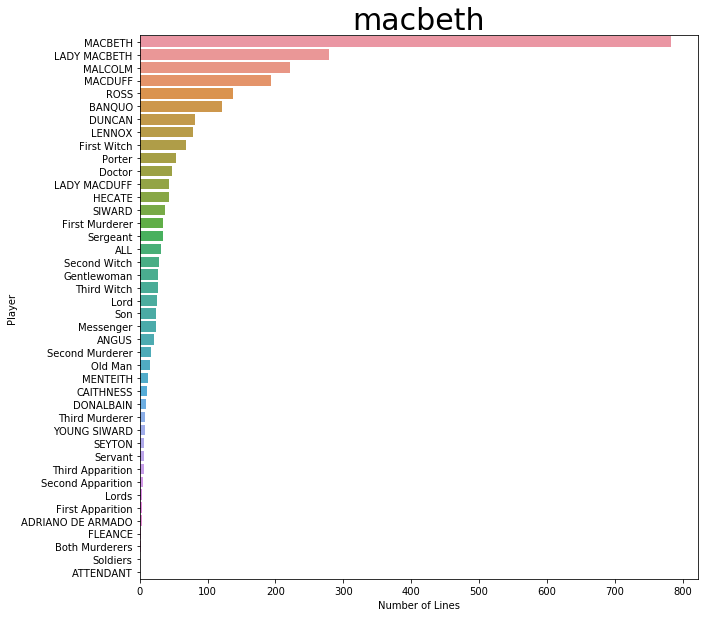

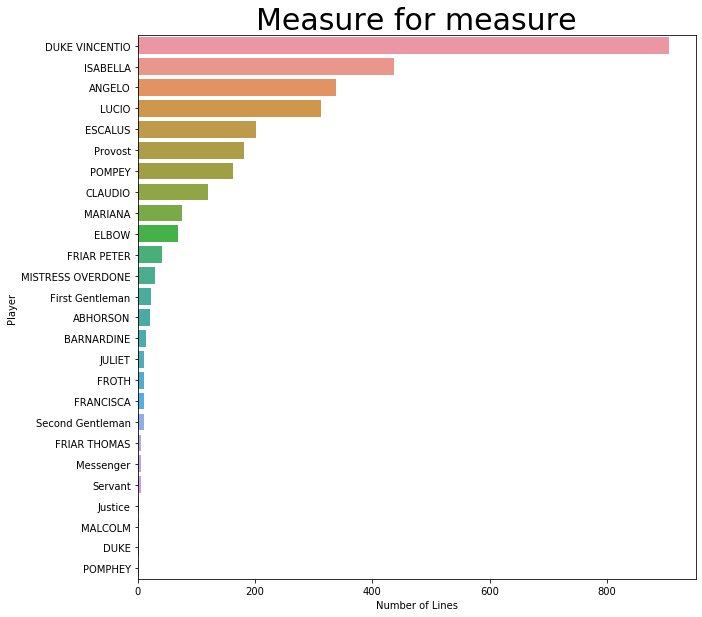

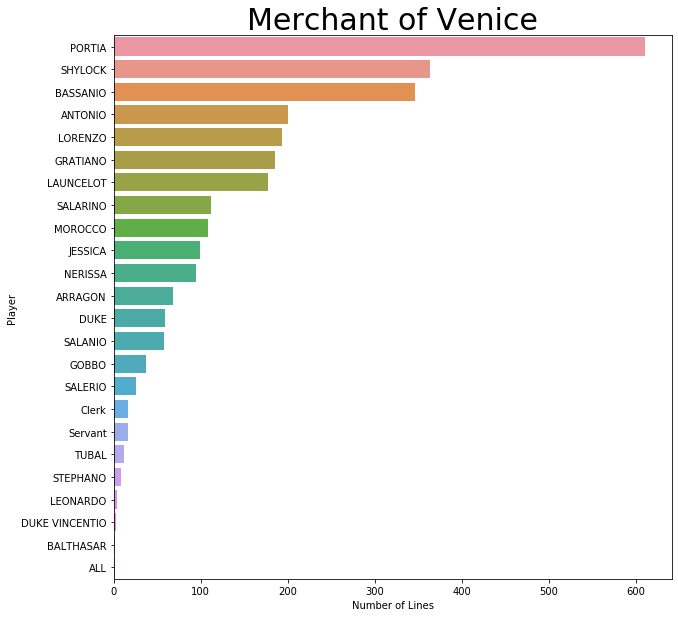

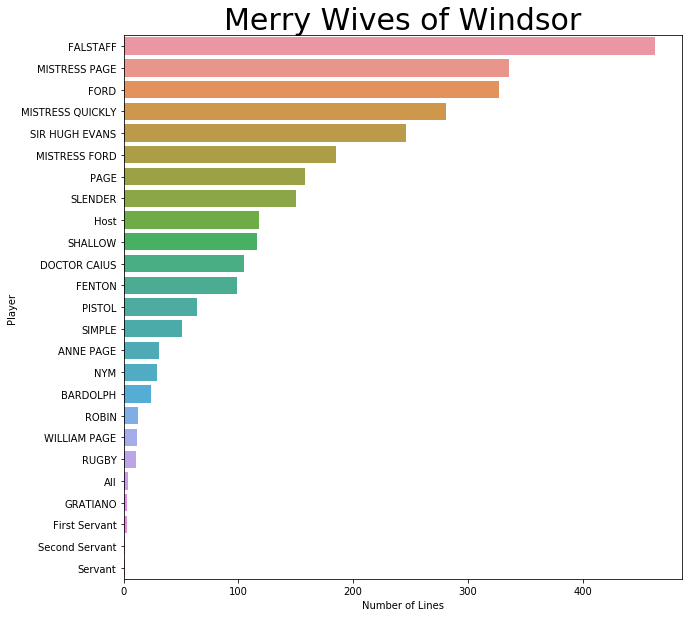

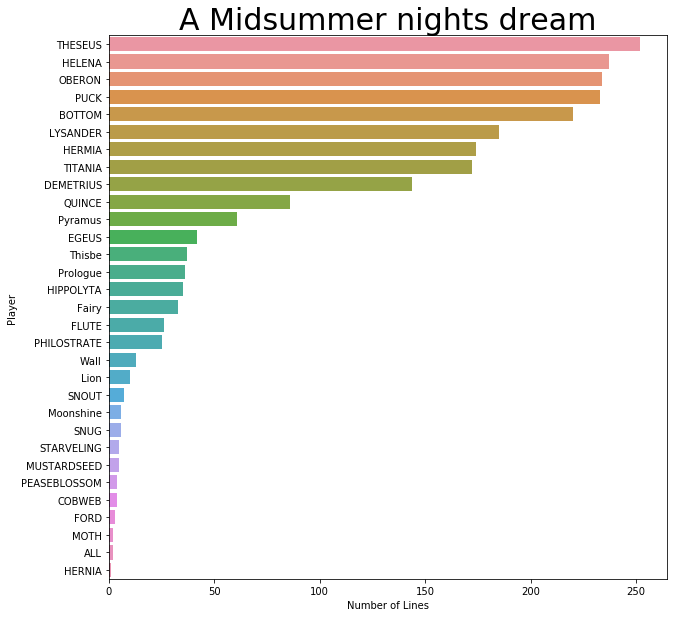

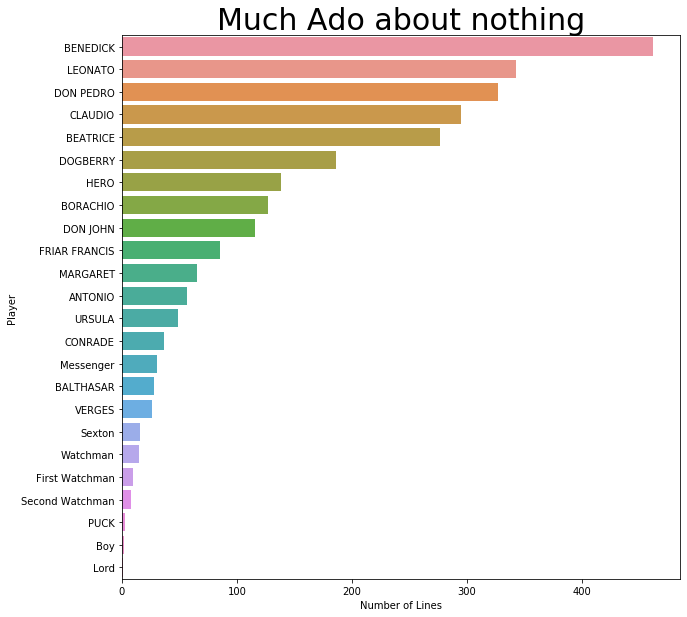

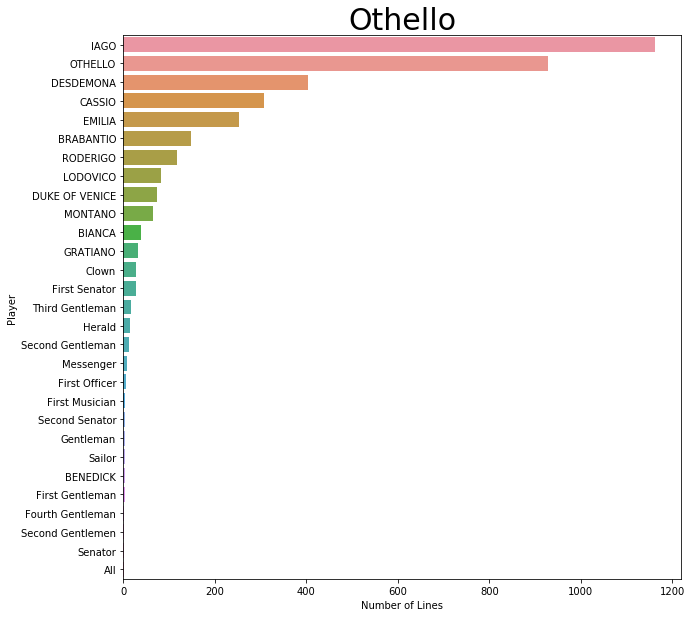

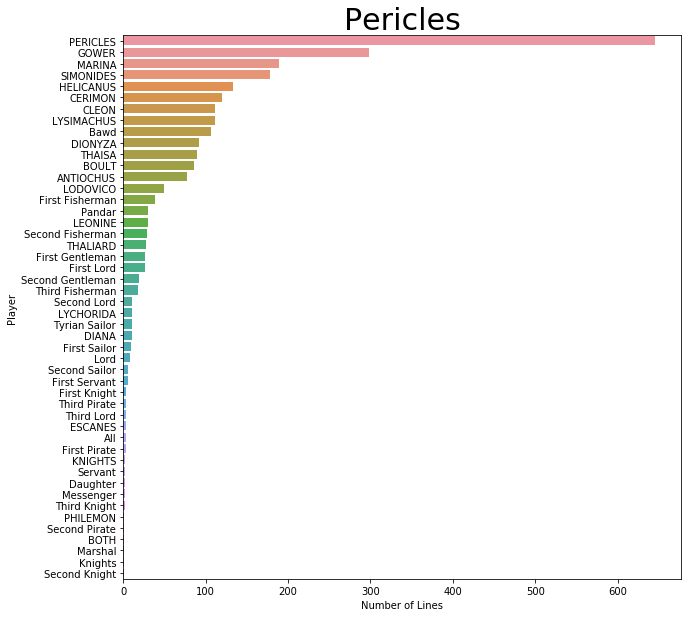

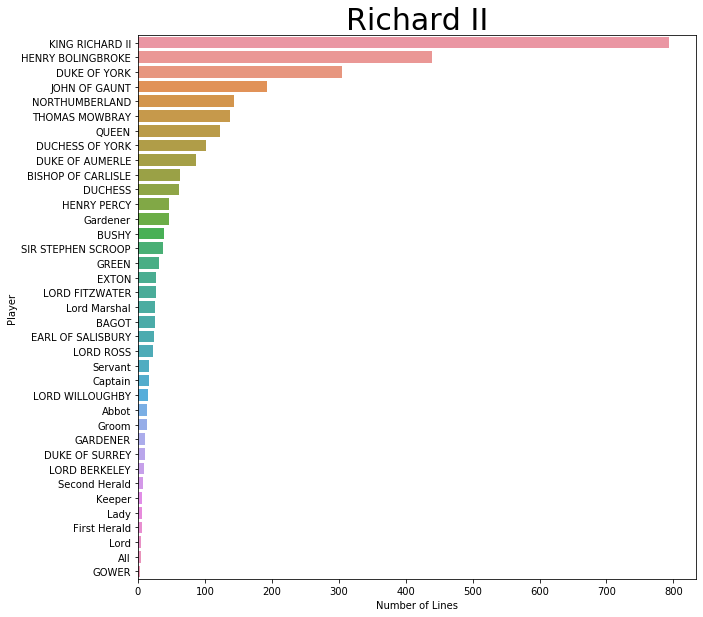

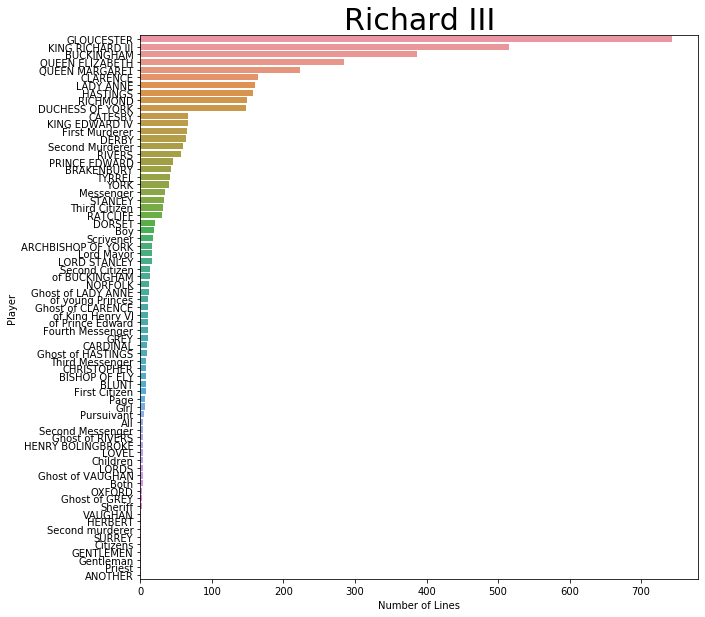

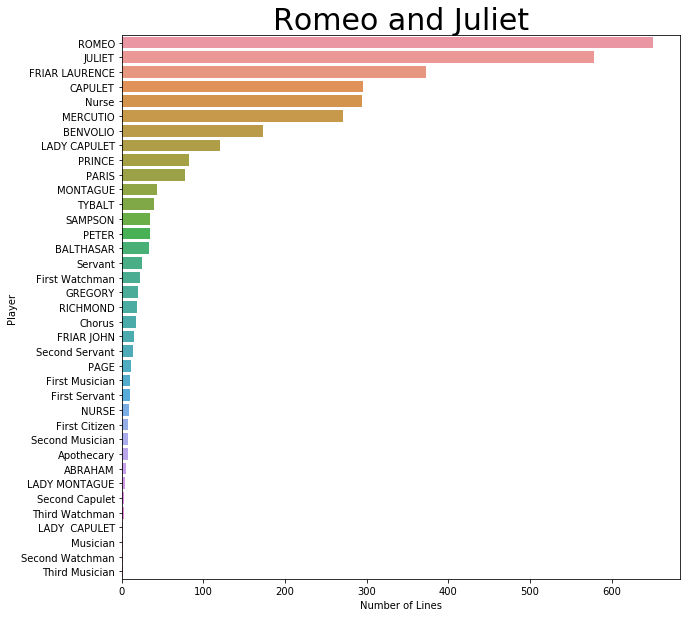

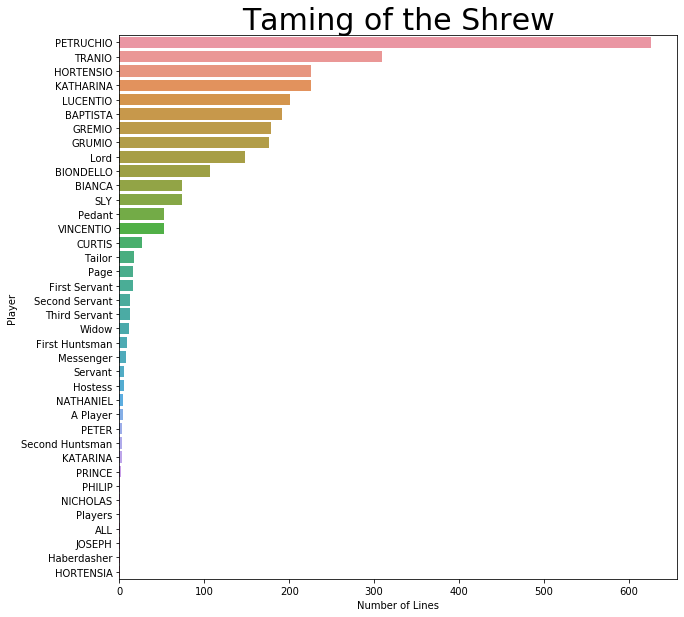

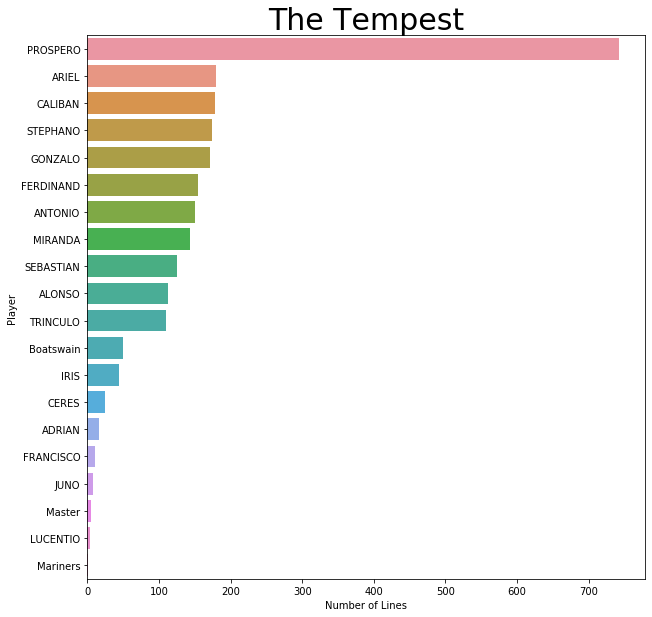

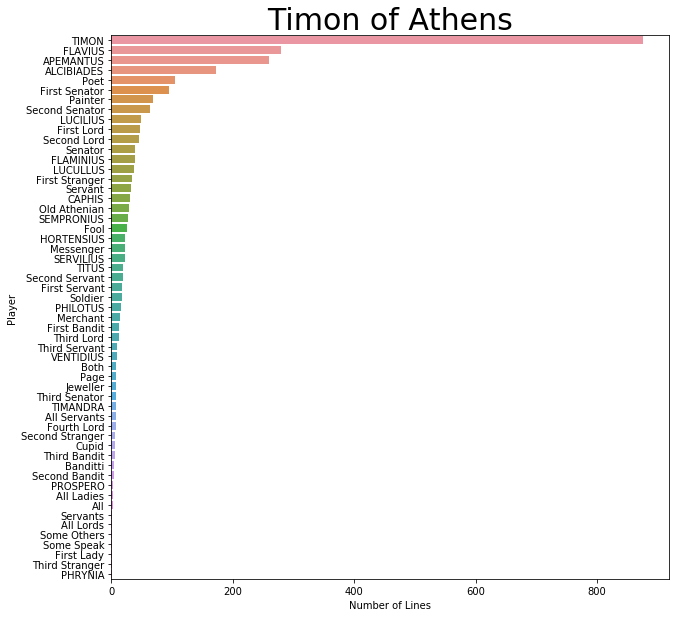

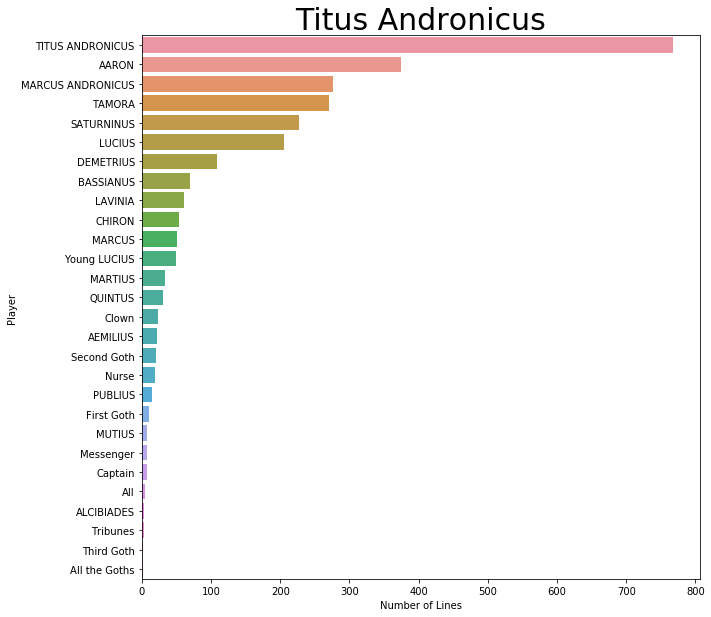

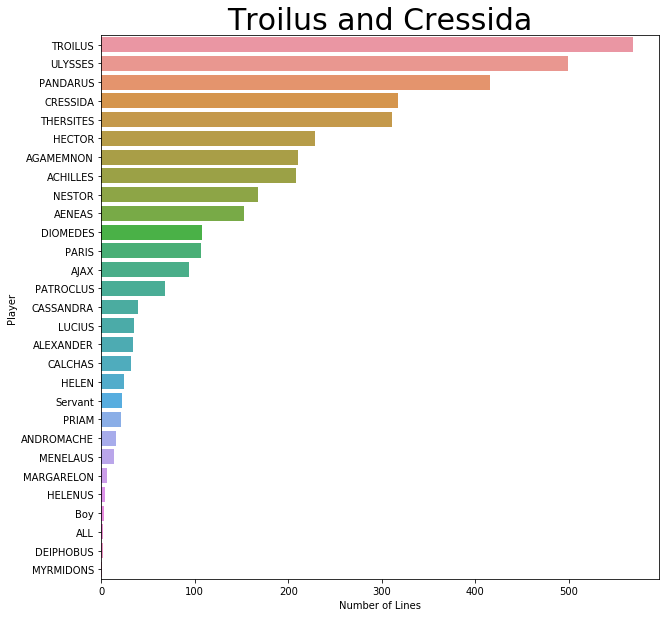

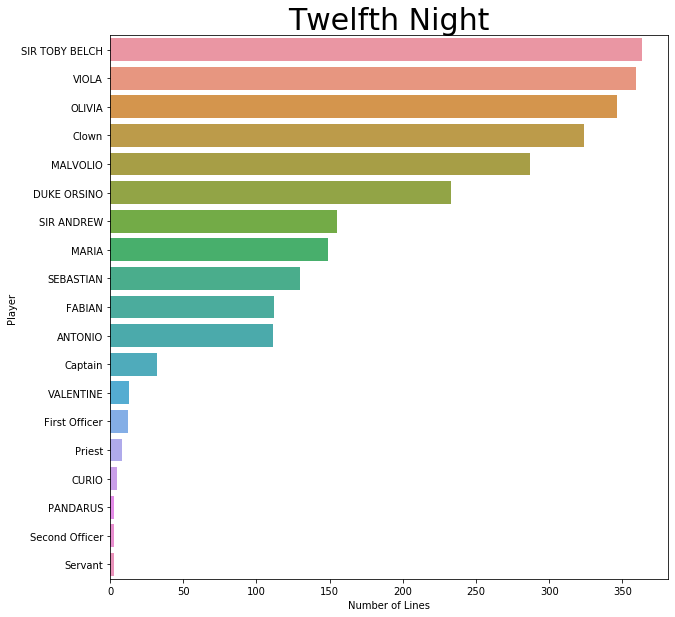

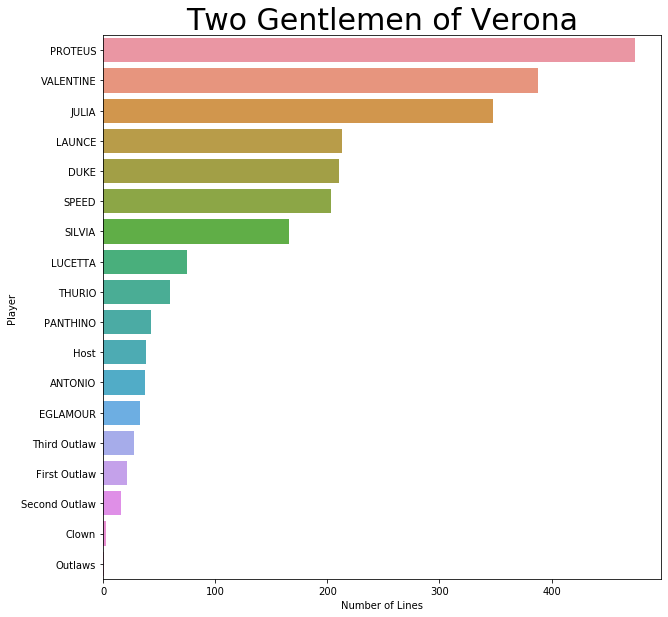

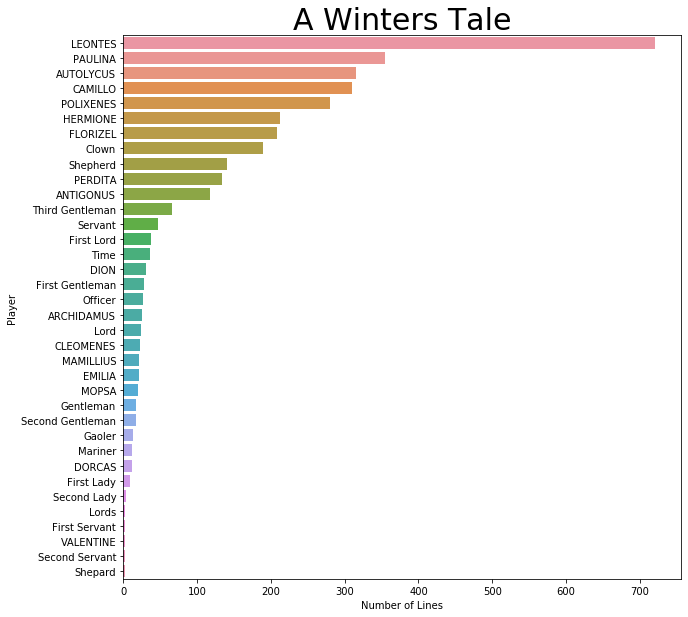

In [23]:
play_name = data['Play'].unique().tolist()

for play in play_name:
    p_line = data[data['Play']==play].groupby('Player').count().sort_values(by='Player-Line',ascending=False)['Player-Line']
    p_line = p_line.to_frame()
    p_line['Player'] = p_line.index.tolist()
    p_line.index = np.arange(0,len(p_line))
    p_line.columns=['Lines','Player']
    plt.figure(figsize=(10,10))
    ax= sns.barplot(x='Lines',y='Player',data=p_line)
    ax.set(xlabel='Number of Lines', ylabel='Player')
    plt.title(play,fontsize=30)
    plt.show()

In [25]:
# Visualzing the plays as a network
g= nx.Graph()

In [26]:
g = nx.from_pandas_edgelist(data,source='Play',target='Player')

In [27]:
print (nx.info(g))

Name: 
Type: Graph
Number of nodes: 971
Number of edges: 1328
Average degree:   2.7353


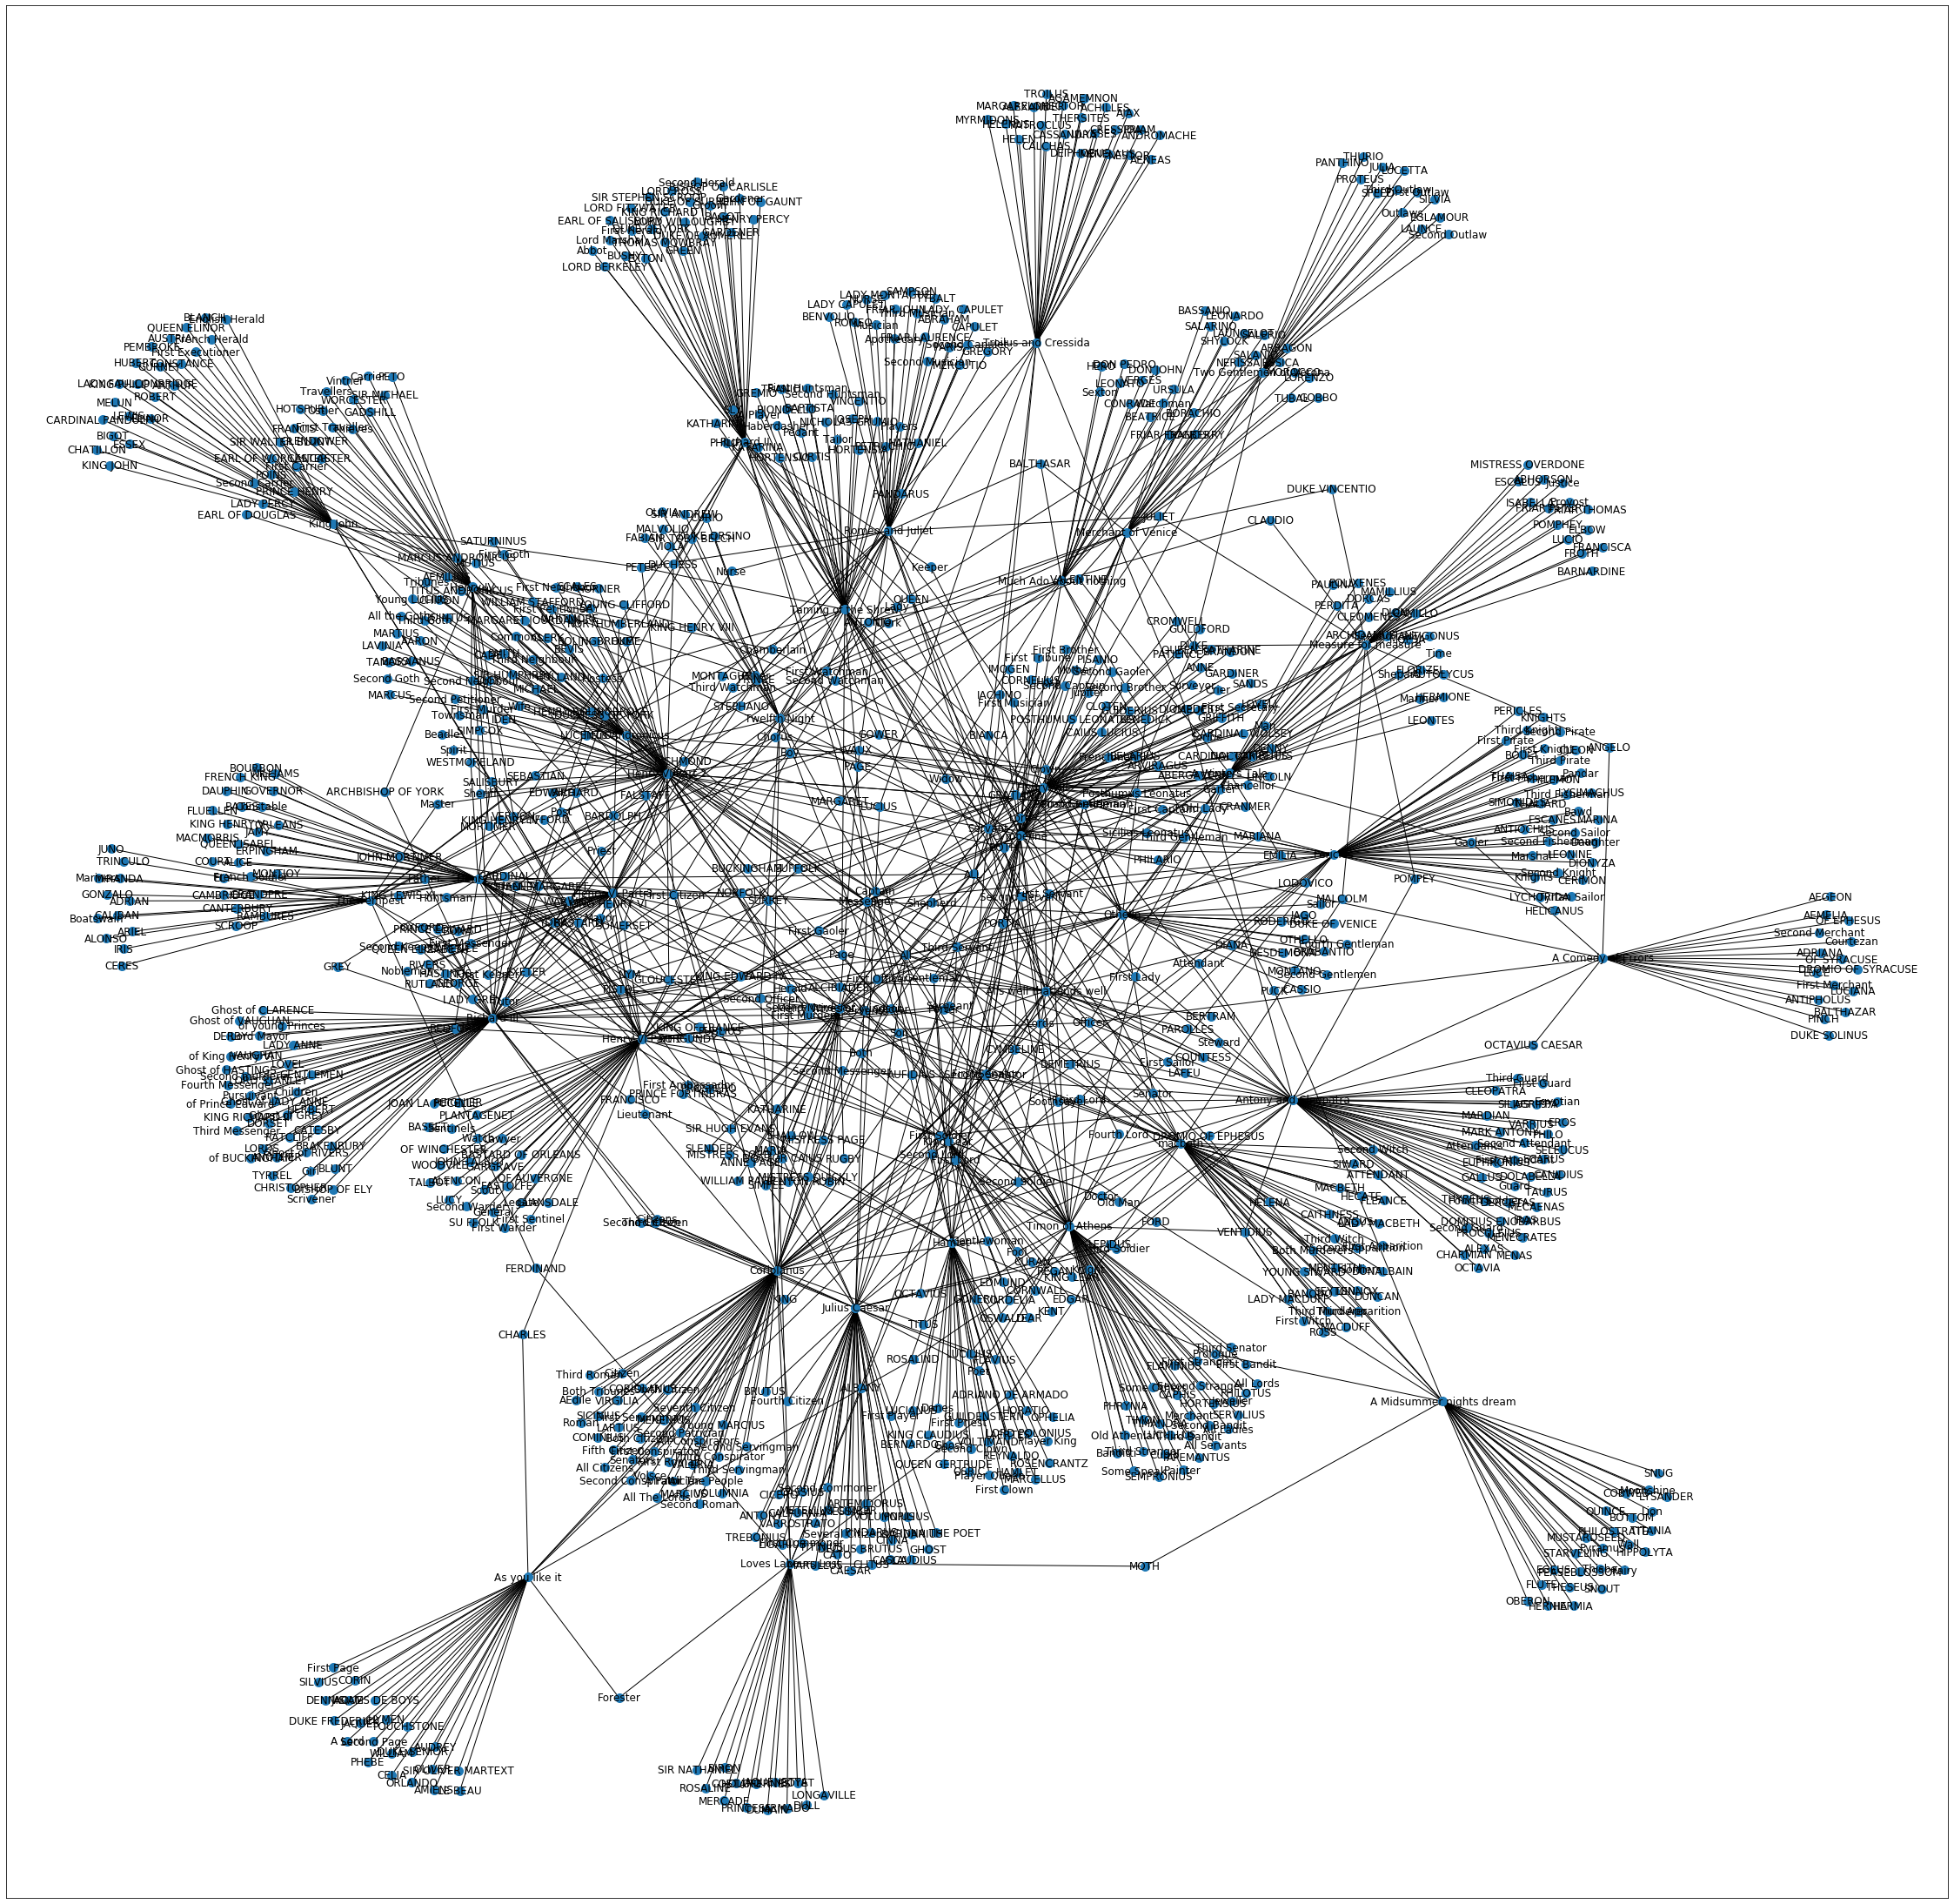

In [28]:
plt.figure(figsize=(40,40)) 
nx.draw_networkx(g,with_labels=True,node_size=100)
plt.show()

In [29]:
centralMeasures = pd.DataFrame(nx.degree_centrality(g),index=[0]).T
centralMeasures.columns=['Degree Centrality']
centralMeasures['Page Rank']= pd.DataFrame(nx.pagerank(g),index=[0]).T
centralMeasures['Name']= centralMeasures.index.tolist()
centralMeasures.index = np.arange(0,len(centralMeasures))

In [31]:
centralMeasures[centralMeasures['Name'].isin(data['Player'].unique().tolist())].sort_values(by='Degree Centrality',ascending=False)

#Centrality measures only for players (or actors)
centralMeasures[centralMeasures['Name'].isin(data['Player'].unique().tolist())].sort_values(by='Page Rank',ascending=False)

#number of nodes that the "Messenger" is connected to across all plays
print(len(list(g.neighbors('Messenger'))))

22


In [32]:
#getting the number of lines a messanger spoke across all the plays
data[data['Player']=='Messenger']['Player-Line'].count()


# Finding the most influential plays
centralMeasures[centralMeasures['Name'].isin(data['Play'].unique().tolist())].sort_values(by='Degree Centrality',ascending=False)

centralMeasures[centralMeasures['Name'].isin(data['Play'].unique().tolist())].sort_values(by='Page Rank',ascending=False)


#number of nodes that "Richard III" is connected to
print(len(list(g.neighbors('Richard III'))))

71
